In [1]:
import numpy as np
import matplotlib.pyplot as plt
import muram as mio
from astropy.io import fits
import pyflct

In [2]:
from matplotlib import font_manager
import matplotlib as mpl
font_path = '/home/flow/.fonts/cmunrm.ttf'  # Your font path goes here
#font_path = '/usr/share/fonts/opentype/urw-base35/NimbusRoman-Italic.otf'
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)
mpl.rcParams["font.size"] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
plt.rc('axes', unicode_minus=False)

In [3]:
from scipy.stats import pearsonr

In [4]:
from scipy.ndimage import gaussian_filter

In [5]:
# Define function for temporal averaging
def temporal_avg(data_in, start, end):
    tmp_avg = np.mean(data_in[start:end], axis = 0)
    return tmp_avg

In [6]:
Vx_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[0].data
Vy_600 = fits.open("pyFLCT_fwhm_600_dt_30_Inte_tracked.fits")[1].data

In [7]:
Vx_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[0].data
Vy_300 = fits.open("pyFLCT_fwhm_300_dt_30_Inte_tracked.fits")[1].data

In [8]:
# After that, we shall load velocities taken directly from simulation
Vx = fits.open("Velocities_TAU_1_0.fits")[1].data # Vy from Velocities.fits as originally thought
Vy = fits.open("Velocities_TAU_1_0.fits")[0].data # Vx from Velocities.fits as originally thought
Vx = Vx.transpose(0, 2, 1)
Vy = Vy.transpose(0, 2, 1)

In [9]:
np.shape(Vx)

(361, 1536, 1536)

In [10]:
# Our next task is to to average velocities using previously defined function
# We shall use the first half of total slices for that

# 360 = full
# 180 = 30 min
# 90 = 15 min
# 60 = 10 min
Vx_mean_sim60 = temporal_avg(Vx, 0, 60)
Vx_mean_sim60 = Vx_mean_sim60/1E5

Vy_mean_sim60 = temporal_avg(Vy, 0, 60)
Vy_mean_sim60 = Vy_mean_sim60/1E5

In [11]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 60)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 60)

In [12]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 60)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 60)

In [13]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim60, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim60, 22.5, mode = "wrap")

In [14]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim60, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim60, 11.25, mode = "wrap")

In [15]:
r_600_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_1)

PearsonRResult(statistic=0.5616806448613417, pvalue=0.0)


In [16]:
r_600_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim60.flatten())
print(r_600_2)

PearsonRResult(statistic=0.7904666749334588, pvalue=0.0)


In [17]:
r_600_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_3)

PearsonRResult(statistic=0.9227464626022692, pvalue=0.0)


In [18]:
r_600_y1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y1)

PearsonRResult(statistic=0.5505031119634194, pvalue=0.0)


In [19]:
r_600_y2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim60.flatten())
print(r_600_y2)

PearsonRResult(statistic=0.7812421901422357, pvalue=0.0)


In [20]:
r_600_y3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y3)

PearsonRResult(statistic=0.9160664073257643, pvalue=0.0)


In [21]:
Vx_mean_sim30 = temporal_avg(Vx, 0, 30)
Vx_mean_sim30 = Vx_mean_sim30/1E5

Vy_mean_sim30 = temporal_avg(Vy, 0, 30)
Vy_mean_sim30 = Vy_mean_sim30/1E5

In [22]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 30)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 30)

In [23]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 30)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 30)

In [24]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim30, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim30, 22.5, mode = "wrap")

In [25]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim30, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim30, 11.25, mode = "wrap")

In [26]:
r_600_30_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_30_1)

PearsonRResult(statistic=0.5616806448613417, pvalue=0.0)


In [27]:
r_600_30_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim30.flatten())
print(r_600_30_2)

PearsonRResult(statistic=0.7426196124622066, pvalue=0.0)


In [28]:
r_600_30_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_30_3)

PearsonRResult(statistic=0.8961013598976955, pvalue=0.0)


In [29]:
r_600_y30_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y30_1)

PearsonRResult(statistic=0.5505031119634194, pvalue=0.0)


In [30]:
r_600_y30_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim30.flatten())
print(r_600_y30_2)

PearsonRResult(statistic=0.7257323919713935, pvalue=0.0)


In [31]:
r_600_y30_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y30_3)

PearsonRResult(statistic=0.8843613953322731, pvalue=0.0)


In [32]:
r_300_30_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_30_1)

PearsonRResult(statistic=0.5134004470982595, pvalue=0.0)


In [33]:
r_300_30_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim30.flatten())
print(r_300_30_2)

PearsonRResult(statistic=0.7546893439356405, pvalue=0.0)


In [34]:
r_300_30_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_30_3)

PearsonRResult(statistic=0.8548445545147499, pvalue=0.0)


In [35]:
r_300_y30_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y30_1)

PearsonRResult(statistic=0.506910234395423, pvalue=0.0)


In [36]:
r_300_y30_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim30.flatten())
print(r_300_y30_2)

PearsonRResult(statistic=0.7349483531555614, pvalue=0.0)


In [37]:
r_300_y30_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y30_3)

PearsonRResult(statistic=0.8389881240949637, pvalue=0.0)


In [38]:
Vx_mean_sim18 = temporal_avg(Vx, 0, 18)
Vx_mean_sim18 = Vx_mean_sim18/1E5

Vy_mean_sim18 = temporal_avg(Vy, 0, 18)
Vy_mean_sim18 = Vy_mean_sim18/1E5

In [39]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 18)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 18)

In [40]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 18)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 18)

In [41]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim18, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim18, 22.5, mode = "wrap")

In [42]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim18, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim18, 11.25, mode = "wrap")

In [43]:
r_600_18_1 = pearsonr(Vx_600[0].flatten(), Vx[0].flatten())
print(r_600_18_1)

PearsonRResult(statistic=0.5616806448613417, pvalue=0.0)


In [44]:
r_600_18_2 = pearsonr(Vx_FLCT_600.flatten(), Vx_mean_sim18.flatten())
print(r_600_18_2)

PearsonRResult(statistic=0.7016708430100425, pvalue=0.0)


In [45]:
r_600_18_3 = pearsonr(Vx_FLCT_600.flatten(), Vx_filtered22.flatten())
print(r_600_18_3)

PearsonRResult(statistic=0.8757512859597407, pvalue=0.0)


In [46]:
r_600_y18_1 = pearsonr(Vy_600[0].flatten(), Vy[0].flatten())
print(r_600_y18_1)

PearsonRResult(statistic=0.5505031119634194, pvalue=0.0)


In [47]:
r_600_y18_2 = pearsonr(Vy_FLCT_600.flatten(), Vy_mean_sim18.flatten())
print(r_600_y18_2)

PearsonRResult(statistic=0.687384655622019, pvalue=0.0)


In [48]:
r_600_y18_3 = pearsonr(Vy_FLCT_600.flatten(), Vy_filtered22.flatten())
print(r_600_y18_3)

PearsonRResult(statistic=0.8623854865567564, pvalue=0.0)


In [49]:
r_300_18_1 = pearsonr(Vx_300[0].flatten(), Vx[0].flatten())
print(r_300_18_1)

PearsonRResult(statistic=0.5134004470982595, pvalue=0.0)


In [50]:
r_300_18_2 = pearsonr(Vx_FLCT_300.flatten(), Vx_mean_sim18.flatten())
print(r_300_18_2)

PearsonRResult(statistic=0.7064936453125374, pvalue=0.0)


In [51]:
r_300_18_3 = pearsonr(Vx_FLCT_300.flatten(), Vx_filtered22.flatten())
print(r_300_18_3)

PearsonRResult(statistic=0.819197025311285, pvalue=0.0)


In [52]:
r_300_y18_1 = pearsonr(Vy_300[0].flatten(), Vy[0].flatten())
print(r_300_y18_1)

PearsonRResult(statistic=0.506910234395423, pvalue=0.0)


In [53]:
r_300_y18_2 = pearsonr(Vy_FLCT_300.flatten(), Vy_mean_sim18.flatten())
print(r_300_y18_2)

PearsonRResult(statistic=0.6905303251482695, pvalue=0.0)


In [54]:
r_300_y18_3 = pearsonr(Vy_FLCT_300.flatten(), Vy_filtered22.flatten())
print(r_300_y18_3)

PearsonRResult(statistic=0.8025370367514495, pvalue=0.0)


In [55]:
# Form a table that contains values for all time values

<h2>Paper plots</h2>

In [56]:
Vx_mean_sim90 = temporal_avg(Vx, 0, 90)
Vx_mean_sim90 = Vx_mean_sim90/1E5

Vy_mean_sim90 = temporal_avg(Vy, 0, 90)
Vy_mean_sim90 = Vy_mean_sim90/1E5

In [57]:
Vx_FLCT_600 = temporal_avg(Vx_600, 0, 90)
Vy_FLCT_600 = temporal_avg(Vy_600, 0, 90)

In [58]:
Vx_FLCT_300 = temporal_avg(Vx_300, 0, 90)
Vy_FLCT_300 = temporal_avg(Vy_300, 0, 90)

In [59]:
Vx_filtered22 = gaussian_filter(Vx_mean_sim90, 22.5, mode = "wrap")
Vy_filtered22 = gaussian_filter(Vy_mean_sim90, 22.5, mode = "wrap")

In [60]:
Vx_filtered11 = gaussian_filter(Vx_mean_sim90, 11.25, mode = "wrap")
Vy_filtered11 = gaussian_filter(Vy_mean_sim90, 11.25, mode = "wrap")

In [61]:
from scipy.stats import linregress

/tmp/ipykernel_10058/2432394557.py:59: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/tmp/ipykernel_10058/2432394557.py:60: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')
/home/flow/anaconda3/envs/flct/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


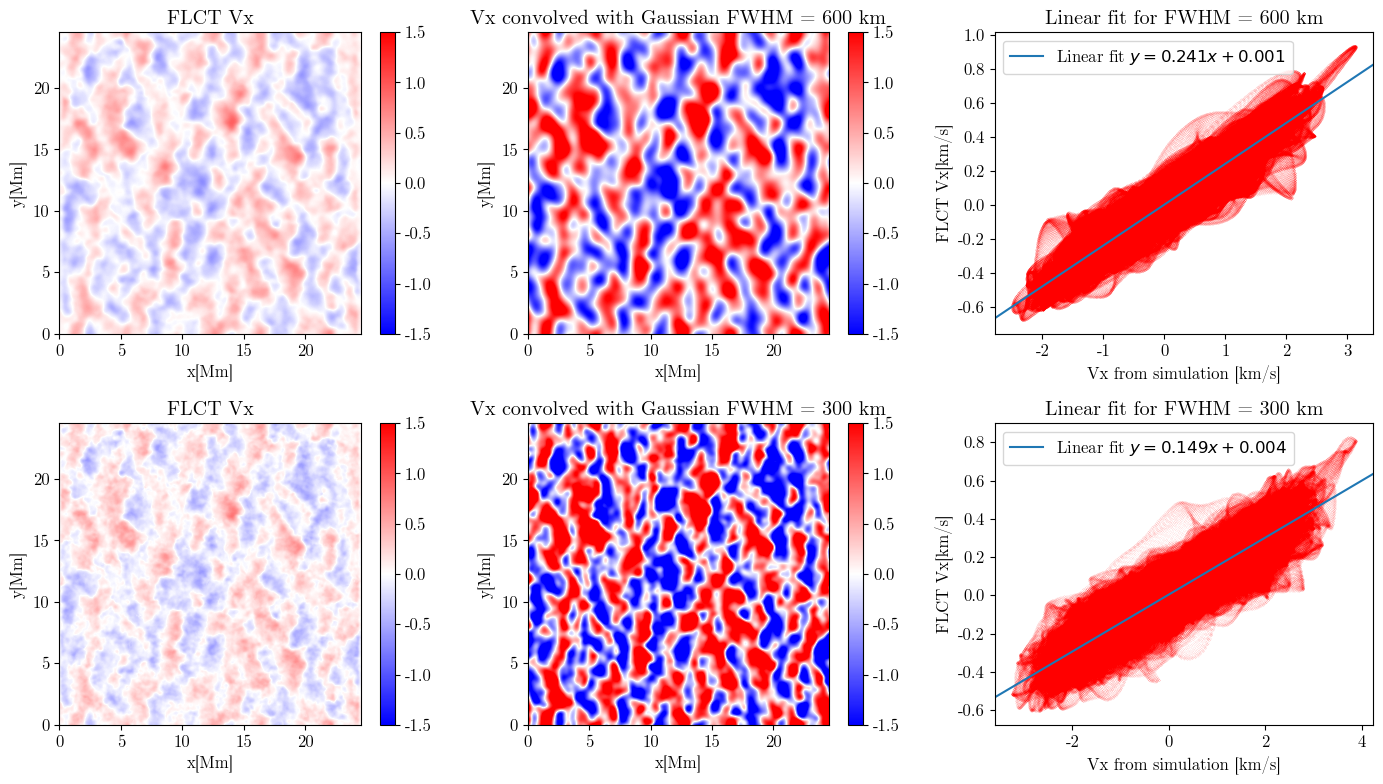

In [62]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("FLCT Vx")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(Vx_FLCT_600[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vx convolved with Gaussian FWHM = 600 km")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Vx_filtered22[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Linear fit for FWHM = 600 km")                                
ax3.set_ylabel("FLCT Vx[km/s]")
ax3.set_xlabel("Vx from simulation [km/s]")
ax3.scatter(Vx_filtered22.flatten(), Vx_FLCT_600.flatten(), s = 0.001, color="red")
m1, b1, *_ = linregress(Vx_filtered22.flatten(), Vx_FLCT_600.flatten())
ax3.axline(xy1=(0, b1), slope=m1, label=f'Linear fit $y = {m1:.3f}x {b1:+.3f}$')
plt.legend()

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("FLCT Vx")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(Vx_FLCT_300[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Vx convolved with Gaussian FWHM = 300 km")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(Vx_filtered11[:, :], origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -1.5, vmax = 1.5)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Linear fit for FWHM = 300 km")                                
ax6.set_ylabel("FLCT Vx[km/s]")
ax6.set_xlabel("Vx from simulation [km/s]")
ax6.scatter(Vx_filtered11.flatten(), Vx_FLCT_300.flatten(), s = 0.001, color="red")
m2, b2, *_ = linregress(Vx_filtered11.flatten(), Vx_FLCT_300.flatten())
ax6.axline(xy1=(0, b2), slope=m2, label=f'Linear fit $y = {m2:.3f}x {b2:+.3f}$')
plt.legend()



plt.tight_layout()
plt.savefig("300_600_comp.png", dpi = 150, bbox_inches = 'tight')

In [63]:
first = np.fromfile("tau_slice_1.000.000000", dtype = "float32")
first_ = first[4:].reshape(11, 1536, 1536)
Bz_1 = first_[7,:,:]
Bz_1 = Bz_1 * np.sqrt(4*np.pi)

In [64]:
V_z_sim = first_[1,:,:]
V_y_sim = first_[3,:,:]
V_x_sim = first_[2,:,:]
T = first_[8,:,:]

In [65]:
from matplotlib import cm
from matplotlib.colors import Normalize

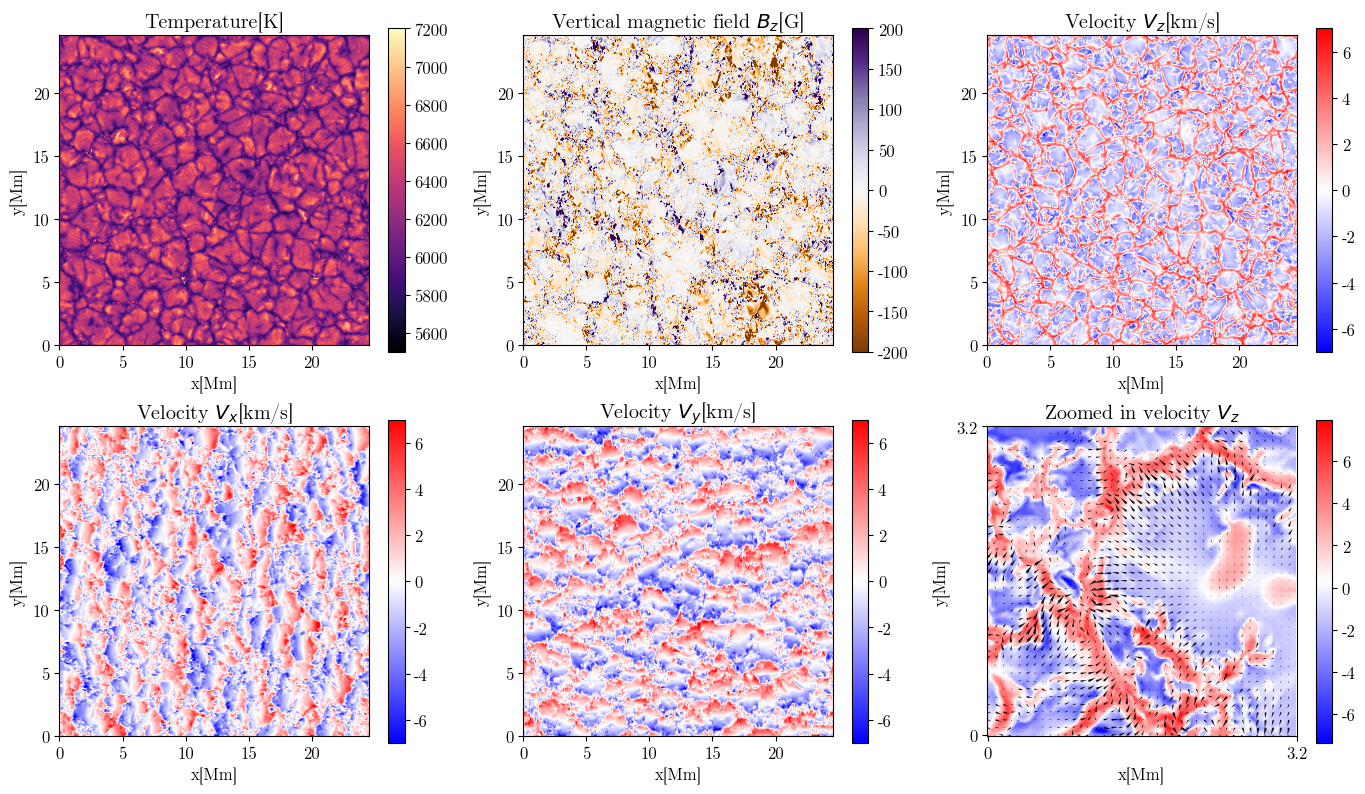

In [80]:
#fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 8))
f = plt.figure(figsize = (14,8))
#plt.suptitle("Linear fit of FLCT Vx and convolved Vx from simulation for FHWM = {1200, 600, 300, 100}km")
# 4x3 plot, velicina A, velicina B, scatter A i B!!!
#ax1 = plt.subplot2grid((4,3), (0,0))
ax1 = f.add_subplot(231)
ax1.set_title("Temperature[K]")
ax1.set_xlabel("x[Mm]")
ax1.set_ylabel("y[Mm]")
im1 = ax1.imshow(T[:, :], origin='lower', cmap = "magma", extent = (0, 24.536, 0, 24.536), vmin = 5500, vmax = 7200)
plt.colorbar(im1)

#ax2 = plt.subplot2grid((4,3), (0,1))
ax2 = f.add_subplot(232)
ax2.set_title("Vertical magnetic field $B_z$[G]")
ax2.set_xlabel("x[Mm]")
ax2.set_ylabel("y[Mm]")
im2 = ax2.imshow(Bz_1[:, :], origin='lower', cmap = "PuOr", extent = (0, 24.536, 0, 24.536),vmin = -200, vmax = 200)
plt.colorbar(im2)

#ax3 = plt.subplot2grid((4,3), (0,2))
ax3 = f.add_subplot(233)
ax3.set_title("Velocity $V_z$[km/s]")                                
ax3.set_xlabel("x[Mm]")
ax3.set_ylabel("y[Mm]")
im3 = ax3.imshow(-V_z_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im3)

#ax4 = plt.subplot2grid((4,3), (1,0))
ax4 = f.add_subplot(234)
ax4.set_title("Velocity $V_x$[km/s]")
ax4.set_xlabel("x[Mm]")
ax4.set_ylabel("y[Mm]")
im4 = ax4.imshow(V_x_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im4)

#ax5 = plt.subplot2grid((4,3), (1,1))
ax5 = f.add_subplot(235)
ax5.set_title("Velocity $V_y$[km/s]")
ax5.set_xlabel("x[Mm]")
ax5.set_ylabel("y[Mm]")
im5 = ax5.imshow(V_y_sim[:, :]/1E5, origin='lower', cmap = "bwr", extent = (0, 24.536, 0, 24.536), vmin = -7, vmax = 7)
plt.colorbar(im5)

#ax6 = plt.subplot2grid((4,3), (1,2))
ax6 = f.add_subplot(236)
ax6.set_title("Zoomed in velocity $V_z$")
ax6.set_xlabel("x[Mm]")
ax6.set_ylabel("y[Mm]")                             
xmin = 0
xmax = 200
ymin = 0
ymax=  200

Bgtx_disp = V_x_sim[ymin:ymax,xmin:xmax]/1E5
Bgty_disp = V_y_sim[ymin:ymax,xmin:xmax]/1E5
Bgtz_disp = V_z_sim[ymin:ymax,xmin:xmax]/1E5

ysize,xsize = np.shape(Bgtx_disp)

stride = 5


xmaxind = int(round(xsize/stride))
ymaxind = int(round(ysize/stride))

xstr, ystr = np.meshgrid(stride*np.arange(0,xmaxind),stride*np.arange(0,ymaxind))
im6 = ax6.imshow(-Bgtz_disp, origin='lower',cmap='bwr')
ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride], headwidth = 4, headaxislength = 12, headlength = 14)
#ax6.quiver(xstr,ystr,Bgtx_disp[::stride,::stride],Bgty_disp[::stride,::stride])
plt.xticks([0,200], [0, 2*1.6])
plt.yticks([0,200], [0, 2*1.6])
#norm = Normalize(vmin=(-0.6)*1e6, vmax = 0.6*1e6)
#plt.colorbar(cm.ScalarMappable(norm=norm, cmap="bwr"), ax = ax6)
plt.colorbar(im6)



plt.tight_layout()
plt.savefig("Simulation_para.png", dpi = 75, bbox_inches = 'tight')

In [74]:
print(V_x_sim/1E5)

[[1.9820384 1.9392114 1.4349072 ... 2.4149725 2.2777548 2.19201  ]
 [2.1276762 1.9948179 1.851506  ... 2.3879929 2.3675025 2.3359892]
 [2.3292916 2.1158216 2.111543  ... 2.2668633 2.3766482 2.362528 ]
 ...
 [1.2814795 0.8281635 0.4775422 ... 2.2872279 2.0980136 1.6468141]
 [1.7232206 1.3365542 0.8931396 ... 2.2000778 2.1020577 1.7868352]
 [1.7848111 1.7380409 1.0780907 ... 2.2899635 2.0827088 1.9643098]]


In [75]:
print(Vx_filtered22)

[[1.002162   0.96283174 0.92266506 ... 1.1136047  1.0776954  1.0404999 ]
 [1.017109   0.97781205 0.937661   ... 1.1283536  1.0925258  1.0553967 ]
 [1.0317123  0.99244654 0.952309   ... 1.1427649  1.1070167  1.0699518 ]
 ...
 [0.9555357  0.91609126 0.8758634  ... 1.0676146  1.0314469  0.99403846]
 [0.97134626 0.93194246 0.89173764 ... 1.0832058  1.0471267  1.0097916 ]
 [0.98689824 0.9475325  0.90734804 ... 1.0985459  1.0625528  1.0252887 ]]
